# Curse of dimensionality

A slightly modified exercise from ESLII, around page 26

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [2]:
class const():
    n = 100
    max_dim = 10
    epsilon = 0.01
    n_experiments = 100

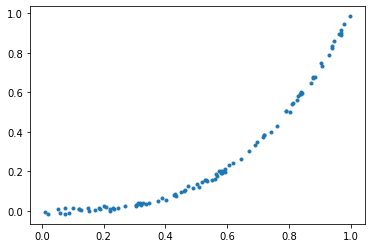

In [3]:
dim = 2
x = np.random.uniform(size=(const.n,dim))
y = x[:,0]**3 + np.random.normal(size=(const.n))*const.epsilon
plt.plot(x[:,0],y,'.');

In [4]:
model = LinearRegression()
model.fit(x , y)
x0 = np.zeros(shape=(1,2))
model.predict(x0)

array([-0.22238379])

In [5]:
# Try KNN:
model = KNeighborsRegressor(n_neighbors = 1)
model.fit(x , y)
model.predict(x0)

array([0.00137658])

### Now combining it all together

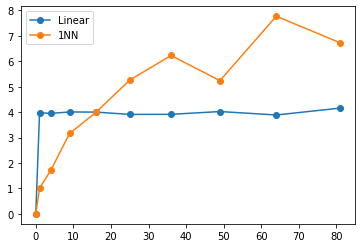

In [8]:
models = [LinearRegression() , KNeighborsRegressor(n_neighbors = 1)]
model_names = ['Linear', '1NN']

result = np.zeros(shape=(const.max_dim , const.n_experiments))
dim_history = np.zeros(const.max_dim)
ax = plt.axes();
for imodel in range(len(models)):
    model = models[imodel]
    for idim in range(1,const.max_dim):
        dim = idim**2
        x0 = np.zeros(shape=(1,dim))
        for i_exp in range(const.n_experiments):
            x = np.random.uniform(low=-1, high=1, size=(const.n , dim))
            y = (1+x[:,0])**3 + np.random.normal(size=(const.n))*const.epsilon
            model.fit(x , y)        
            result[idim,i_exp] = model.predict(x0)**2
            dim_history[idim] = dim

    plt.plot(dim_history , np.mean(result,axis=1) , '-o' , label=model_names[imodel]);
    
ax.legend();